# Imports

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants

In [12]:
# Set all the Constants
kBBar = 0.695038
GramToKiloGram = 1/1000
eVToJoules = 1.602*10**(-19)
No = 6.022*10**(23)
R = 8.314

# MW
MW_H = 1.01
MW_I = 126.9

# Z Rot Calculation

In [13]:
# Create Data Frame
ZRotInfo = pd.DataFrame({
    "Molecule" : ["H2", "I2", "HI"],
    "Be" : [60.853, 0.0373, 6.4264],
    "Sigma" : [2, 2, 1]
})

# Calculate into Table
ZRotInfo["PhiRot"] = ZRotInfo["Be"]/kBBar

# Create Lambda Functions
ZRot_H2 = lambda T: T/(ZRotInfo["Sigma"][0] * ZRotInfo["PhiRot"][0])
ZRot_I2 = lambda T: T/(ZRotInfo["Sigma"][1] * ZRotInfo["PhiRot"][1])
ZRot_HI = lambda T: T/(ZRotInfo["Sigma"][2] * ZRotInfo["PhiRot"][2])

# Display Table
display(ZRotInfo)

,Molecule,Be,Sigma,PhiRot
0,H2,60.8530,2,87.553486
1,I2,0.0373,2,0.053666
2,HI,6.4264,1,9.246113


# Z Vib Calculation

In [14]:
# Create DataFrame
ZVibInfo = pd.DataFrame({
    "Molecule" : ["H2", "I2", "HI"],
    "Vosc" : [4401.21, 214.50, 2309.01]
})

# Calculate the Table
ZVibInfo["PhiVib"] = ZVibInfo["Vosc"]/kBBar

# Create Lambda Functions
ZVib_H2 = lambda T: 1/(1 - np.exp(-ZVibInfo["PhiVib"][0]/T))
ZVib_I2 = lambda T: 1/(1 - np.exp(-ZVibInfo["PhiVib"][1]/T))
ZVib_HI = lambda T: 1/(1 - np.exp(-ZVibInfo["PhiVib"][2]/T))

# Display the Table
display(ZVibInfo)

,Molecule,Vosc,PhiVib
0,H2,4401.21,6332.330031
1,I2,214.50,308.616220
2,HI,2309.01,3322.134905


# Molecular Weight Calculation

In [15]:
# Create DataFrame
MWInfo = pd.DataFrame({
    "Molecule" : ["H2", "I2", "HI"],
    "MW Atom 1" : [MW_H, MW_I, MW_H],
    "MW Atom 2" : [MW_H, MW_I, MW_I]
})

# Calculate the Total MW
MWInfo["MW Total"] = MWInfo["MW Atom 1"] + MWInfo["MW Atom 2"]

# Calculate with Actual Units
MWInfo["MW Total Kg"] = MWInfo["MW Total"] * GramToKiloGram

# Display the Table
display(MWInfo)

,Molecule,MW Atom 1,MW Atom 2,MW Total,MW Total Kg
0,H2,1.01,1.01,2.02,0.00202
1,I2,126.90,126.90,253.80,0.25380
2,HI,1.01,126.90,127.91,0.12791


# W electric Info

In [16]:
# Create DataFrame
WelInfo = pd.DataFrame({
     "Molecule" : ["H2", "I2", "HI"],
     "Wel" : [1, 1, 1]
})

# Display the Table
display(WelInfo)

,Molecule,Wel
0,H2,1
1,I2,1
2,HI,1


# ΔUo Calculation

In [17]:
# Create DataFrame
# Create DataFrame
UOInfo = pd.DataFrame({
     "Molecule" : ["H2", "I2", "HI"],
     "Do eV" : [4.47813, 1.54238, 3.0541]
})

# Convert to Joules
UOInfo["Do Joules"] = UOInfo["Do eV"] * eVToJoules

# Calculate Uo
#Uo = -No * (2*UOInfo["Do Joules"][2] - (UOInfo["Do Joules"][1] + UOInfo["Do Joules"][0]))
Uo = -No * ((UOInfo["Do Joules"][1] + UOInfo["Do Joules"][0]) - 2*UOInfo["Do Joules"][2])

# Create Lambda Function
DelUoContribution = lambda T : np.exp(-Uo/(R*T))

# Display Uo
print("ΔUo : ", Uo)

# Display the Table
display(UOInfo)

ΔUo :  8459.668263599997


,Molecule,Do eV,Do Joules
0,H2,4.47813,7.173964e-19
1,I2,1.54238,2.470893e-19
2,HI,3.05410,4.892668e-19


# Creating Kp Function

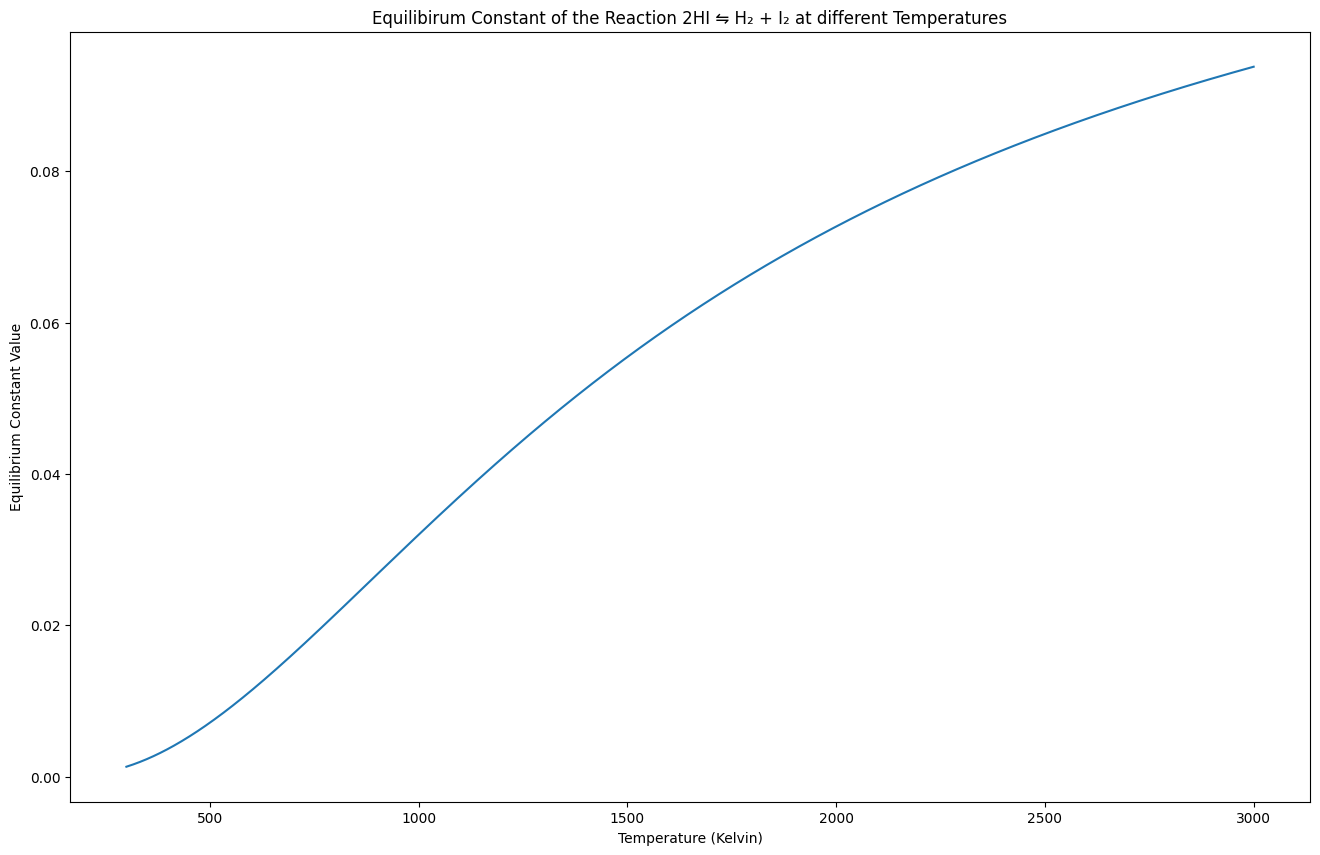

In [18]:
# H2 Contribution
H2Contribution = lambda T: MWInfo["MW Total Kg"][0]**(3/2)*ZRot_H2(T)*ZVib_H2(T)

# I2 Contribution
I2Contribution = lambda T: MWInfo["MW Total Kg"][1]**(3/2)*ZRot_I2(T)*ZVib_I2(T)

# HI Contribution
HIContribution = lambda T: MWInfo["MW Total Kg"][2]**(3/2)*ZRot_HI(T)*ZVib_HI(T)

# Final Kp Equation
Kp = lambda T: ((H2Contribution(T) * I2Contribution(T)) / (HIContribution(T)**2)) * DelUoContribution(T)

# Get the T Spacing
t = np.linspace(300, 3000, 1000)

# Plotting
plt.figure(figsize=(16, 10))
plt.title("Equilibirum Constant of the Reaction 2HI ⇋ H₂ + I₂ at different Temperatures")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Equilibrium Constant Value")
plt.plot(t, Kp(t))
plt.savefig("EquilibriumConstant.png")
plt.show()

In [19]:
print(Kp(763.8))
print(Kp(666.8))

0.019522949879168278
0.014604183123842367
